# Solutions to Exercise 5

This notebook contains solutions to [Exercise 5](../Exercise%205.ipynb).

<br><br><br><br>

## Background

In stories written for popular audiences, census data is often presented
at the zip code level. This makes some sense, because people know what zip
code they live in, but rarely know what census tract they live in.

Unfortunately, the U.S. Census Bureau does not know about zip codes as defined
by the U.S. Postal Service. The closest approximation they have is zip code
tabulation areas, which for 
[technical reasons](https://www.census.gov/programs-surveys/geography/guidance/geo-areas/zctas.html) 
are close but not exactly the same thing.

You can query them with `zip_code_tabulation_area=`. Note this is off-spine. Zip code
tabulation areas do not even nest within states.

## a) Plot the zip codes in San Antonio, TX

With the caveats above in mind, plot the zip codes, "contained within," San Antonio,
Texas.

In [1]:
import censusdis.data as ced
import censusdis.maps as cem
from censusdis.datasets import ACS5
import censusdis.states as states
from censusdis.places.texas import SAN_ANTONIO_CITY

In [2]:
gdf_san_antonio_zips = ced.contained_within(
    state=states.TX,
    place=SAN_ANTONIO_CITY,
).download(
    ACS5,
    2020,
    ["NAME"],
    zip_code_tabulation_area="*",
    with_geometry=True,
)

In [3]:
gdf_san_antonio = ced.download(
    ACS5,
    2020,
    ["NAME"],
    state=states.TX,
    place=SAN_ANTONIO_CITY,
    with_geometry=True,
)

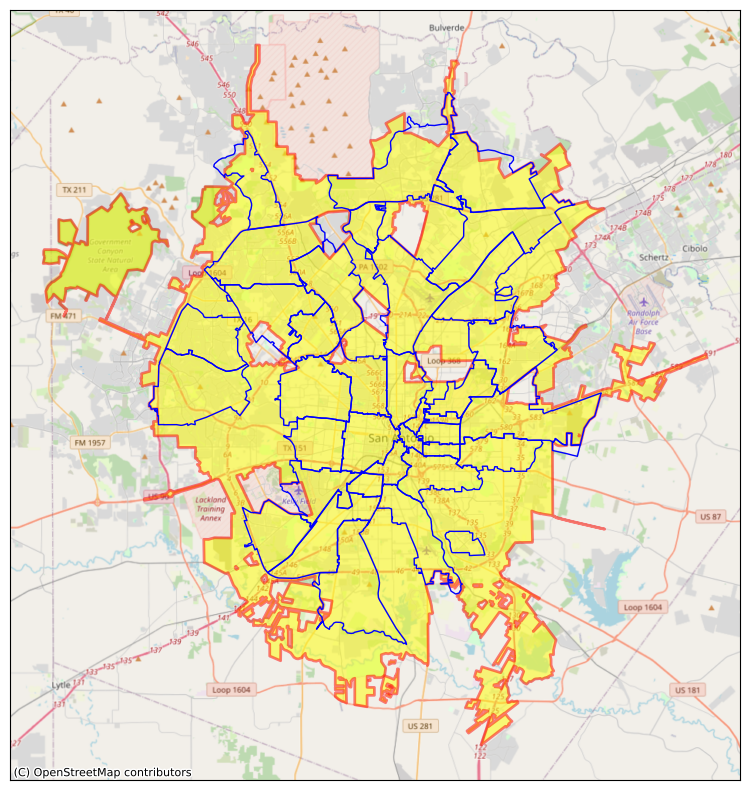

In [4]:
ax = cem.plot_map(
    gdf_san_antonio,
    color="yellow",
    edgecolor="red",
    linewidth=2,
    alpha=0.5,
    figsize=(10, 10),
    with_background=True,
)

ax = cem.plot_map(
    gdf_san_antonio_zips.boundary,
    color="blue",
    linewidth=1,
    ax=ax,
)

## b) Repeat, but with a smaller area overlap threshold

Use `area_threshold=0.2` as an agrument to `ced.contained_within` instead of the default
value of `0.8`.

In [5]:
gdf_san_antonio_zips_2 = ced.contained_within(
    state=states.TX,
    place=SAN_ANTONIO_CITY,
    area_threshold=0.2,
).download(
    ACS5,
    2020,
    ["NAME"],
    zip_code_tabulation_area="*",
    with_geometry=True,
)

In [6]:
gdf_san_antonio = ced.download(
    ACS5,
    2020,
    ["NAME"],
    state=states.TX,
    place=SAN_ANTONIO_CITY,
    with_geometry=True,
)

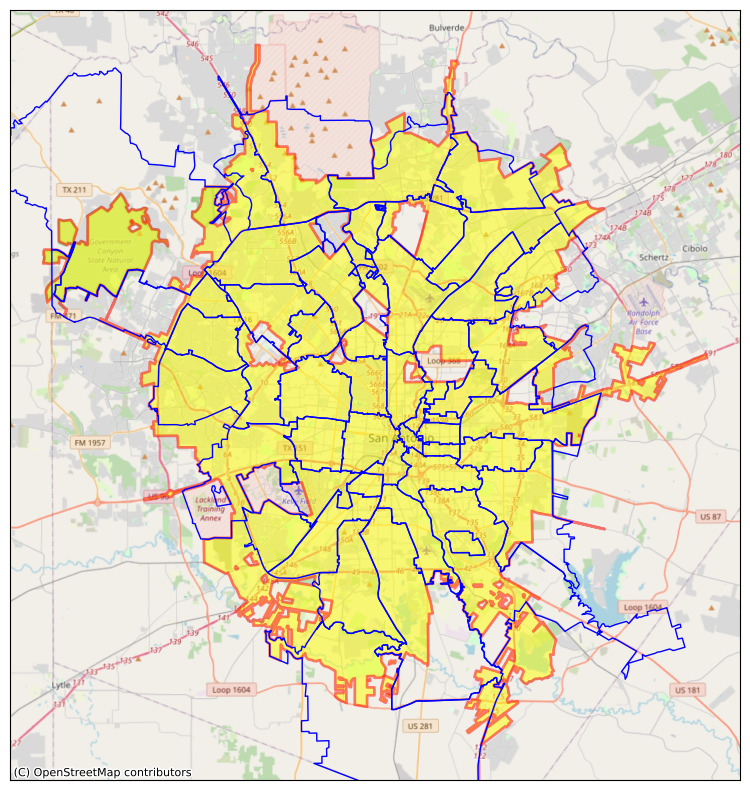

In [7]:
ax = cem.plot_map(
    gdf_san_antonio,
    color="yellow",
    edgecolor="red",
    linewidth=2,
    alpha=0.5,
    figsize=(10, 10),
    with_background=True,
)

ax = cem.plot_map(
    gdf_san_antonio_zips_2.boundary,
    color="blue",
    linewidth=1,
    ax=ax,
)

## c) How meaningful is is to talk about "zip codes in a city?"

You can answer with text and/or data.

It is not necessarily that meaningful. Zip codes (as approximated by U.S. Census
zip code tabulation areas) can, and often do cross city limits.

In [8]:
# How many zip codes "in" San Antonio with the 80% threshold?
len(gdf_san_antonio_zips.index)

36

In [9]:
# How many when the threshold is lowered to 0.2?
len(gdf_san_antonio_zips_2.index)

51